In [2]:
# get sumbissions and authors
import praw
user_agent = ("Mental Health 1.0 by /u/kakakuo ")
r = praw.Reddit(user_agent=user_agent)
subreddit_name = 'depression'
# get all submissions of subreddit 
submissions = r.get_subreddit(subreddit_name).get_top_from_all(limit = 1000)
# go through all submissions
depress_list = []
author_list = []
for submission in submissions:
    if submission.author:
        author_list.append(submission.author._case_name)
    if submission.selftext:
        depress_list.append(submission.selftext)

In [ ]:
# save authors
f = open('author_list','w')
for i in author_list:
    f.write(i)
    f.write('\n')
f.close()

In [4]:
# random get 800 posts
import time
other_list = []
posts = r.get_new(limit=10000)
while True:
    try:
        post = posts.next()
        if post.selftext:
            other_list.append(post.selftext)
            if len(other_list)>800:
                break
    except:
        break

In [ ]:
# save two corpus
for (N,i) in enumerate(depress_list):
    f = open('depress/corpus_'+str(N),'w')
    f.write(i.encode('utf-8').strip())
    f.close()
for (N,i) in enumerate(other_list):
    f = open('other/corpus_'+str(N),'w')
    f.write(i.encode('utf-8').strip())
    f.close()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/yuqikuo/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/yuqikuo/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/yuqikuo/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/yuqikuo/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the c

In [10]:
# basic statistic visualization
from nltk.tokenize import sent_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

depress_num_sentence = []
depress_words = []
other_num_sentence = []
other_words = []
depress_words_num = []
other_words_num = []
for i in depress_list:
    sent = sent_tokenize(i)
    depress_num_sentence.append(len(sent))
    for j in sent:
        tmp = tokenizer.tokenize(j)
        depress_words += tmp
        depress_words_num.append(len(tmp))
        
for i in other_list:
    sent = sent_tokenize(i)
    other_num_sentence.append(len(sent))
    for j in sent:
        tmp = tokenizer.tokenize(j)
        other_words += tmp
        other_words_num.append(len(tmp))

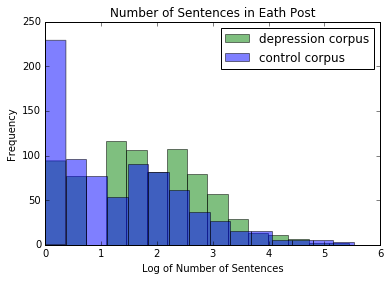

In [19]:
# number of sentences in posts
plt.hist(np.log(np.array(depress_num_sentence)),15, facecolor='g', alpha=0.5,label="depression corpus")
plt.hist(np.log(np.array(other_num_sentence)),15, facecolor='b', alpha=0.5,label="control corpus")
plt.title('Number of Sentences in Eath Post')
plt.xlabel('Log of Number of Sentences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

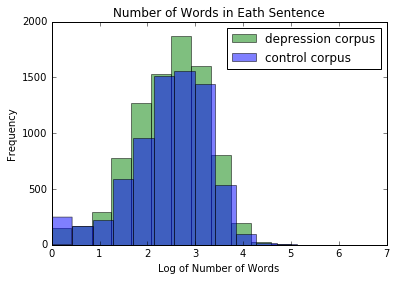

In [23]:
# number of words in sentences
depress_words_num = np.array(depress_words_num)
depress_words_num = depress_words_num[depress_words_num!=0]
other_words_num = np.array(other_words_num)
other_words_num = other_words_num[other_words_num!=0]
plt.hist(np.log(depress_words_num),15, facecolor='g', alpha=0.5,label="depression corpus")
plt.hist(np.log(other_words_num),15, facecolor='b', alpha=0.5,label="control corpus")
plt.title('Number of Words in Eath Sentence')
plt.xlabel('Log of Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

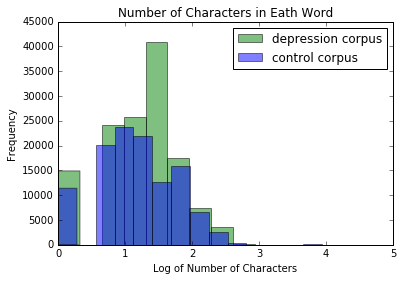

In [27]:
# number of sentences in posts
depress_cha_nums = []
for i in depress_words:
    depress_cha_nums.append(len(i))
other_cha_nums = []
for i in other_words:
    other_cha_nums.append(len(i))

plt.hist(np.log(np.array(depress_cha_nums)),15, facecolor='g', alpha=0.5,label="depression corpus")
plt.hist(np.log(np.array(other_cha_nums)),15, facecolor='b', alpha=0.5,label="control corpus")
plt.title('Number of Characters in Eath Word')
plt.xlabel('Log of Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [29]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
stop = set(stopwords.words('english'))
depress_words_new = []
for i in depress_words:
    tmp = i.strip().lower()
    if tmp not in stop:
        depress_words_new.append(stemmer.stem(tmp))
other_words_new = []
for i in other_words:
    tmp = i.strip().lower()
    if tmp not in stop:
        other_words_new.append(stemmer.stem(tmp)) 

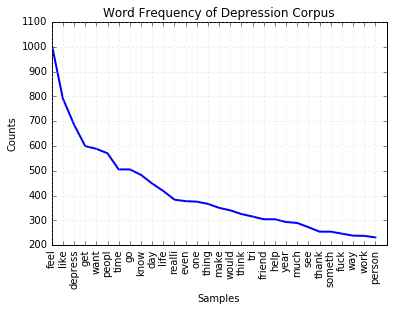

In [30]:
from nltk import FreqDist
plt.title('Word Frequency of Depression Corpus')
fdist1 = FreqDist(depress_words_new)
fdist1.plot(30, cumulative=False)

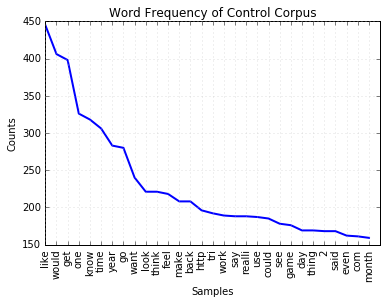

In [31]:
from nltk import FreqDist
plt.title('Word Frequency of Control Corpus')
fdist1 = FreqDist(other_words_new)
fdist1.plot(30, cumulative=False)

In [40]:
from collections import Counter
depress_counter = Counter(depress_words_new)
#.items()
#depress_counter.sort(key=lambda tup: -tup[1])
other_counter = Counter(other_words_new)
#.items()
#other_counter.sort(key=lambda tup: -tup[1])
#print depress_counter[:50]
#print other_counter[:50]

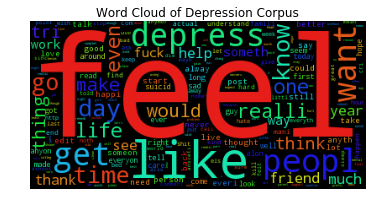

In [34]:
from wordcloud import WordCloud
wordcloud = WordCloud().fit_words(depress_counter)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud of Depression Corpus')
plt.show()

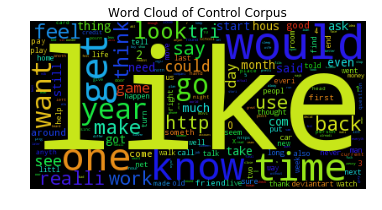

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud().fit_words(other_counter)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud of Control Corpus')
plt.show()

In [9]:
len(set(other_list))

800

In [63]:
depress_counter['life']/float(len(depress_words_new))

0.0070296116097642814

In [64]:
other_counter['life']/float(len(other_words_new))

0.0017203767092918078